<a href="https://colab.research.google.com/github/anisha-nanda/Deep-learning-application/blob/main/CHE_DL_A2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
Problem statement:
Automatic Covid disease detection by chest X-ray images through CNN model.

Description:
You are given a dataset of X-rays images.
Dataset is divided into train and test data
further divided into three categories -
Normal , Covid and Viral Pneumonia.

You need to create a common directory for train and test images
(hint: you need to import os library for this, look on internet for working)
then resize the images and normalize data if needed,
Split train data into train data and validation data.
Convert categorical data into numerical data.
Then Build a CNN model and fit the model on train data,
validate the model and play with the hyperparameters
for eg. no of layers, no. of filters, size of filters, padding, stride.
You can also try different optimizers and activation functions.
Also plot the your results
for eg, loss vs epochs , accuracy vs epochs for train and validation data.

Your final task is to build a efficient CNN model which can classify
unseen chest X-ray image into normal or covid or Viral Pneumonia with
the accuracy more than 85%

deadline for assignment is: 5th April
'''

In [30]:
'''
i) create common directory

ii) preprocess data
- resize images, normalise etc
- split into train, test, validate
- one hot encode

iii) build  the model, fit data

iv) enhance model (85% acc min)

v) plot results

'''

'\ni) create common directory\n\nii) preprocess data\n- resize images, normalise etc\n- split into train, test, validate\n- one hot encode\n\niii) build  the model, fit data\n\niv) enhance model (85% acc min)\n\nv) plot results\n\n'

In [31]:
# importing libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from zipfile import ZipFile
from matplotlib.colors import LinearSegmentedColormap

In [32]:
# setting a seed to ensure reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
#with ZipFile("/content/Covid19_dataset.zip", "r") as zipobj: #/content/Covid19_dataset.zip
#  zipobj.extractall()

In [33]:
# GPU
print("GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
train_dir = r"/content/drive/MyDrive/Covid19-dataset/train"  #"MacintoshHD\Users\anishananda\Downloads\Covid19_dataset\Covid19-dataset\train"
test_dir = r"/content/drive/MyDrive/Covid19-dataset/test"  #"MacintoshHD\Users\anishananda\Downloads\Covid19_dataset\Covid19-dataset\test"
img_width, img_height = 150, 150
batchsize = 10

GPUs Available:  0


In [34]:
# creating a common directory for train and test images
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(img_width, img_height),
                                                    batch_size=10,
                                                    class_mode='categorical',
                                                    subset='training')

validation_generator = train_datagen.flow_from_directory( train_dir,
                                                          target_size=(img_width, img_height),
                                                          batch_size=10,
                                                          class_mode='categorical',
                                                          subset='validation')

test_generator = test_datagen.flow_from_directory( test_dir,
                                                   target_size=(img_width, img_height),
                                                   batch_size=10,
                                                   class_mode='categorical',
                                                   shuffle=False)

Found 168 images belonging to 3 classes.
Found 42 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [35]:
# building the model

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])

# compiling the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [36]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 128)      

In [37]:
# fitting the model
history = model.fit(train_generator,
    steps_per_epoch=train_generator.samples // batchsize,
    epochs=16,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batchsize)


Epoch 1/16
16/16 [==============================] - 26s 1s/step - loss: 1.0300 - accuracy: 0.4747 - val_loss: 0.6259 - val_accuracy: 0.8500
Epoch 2/16
16/16 [==============================] - 18s 1s/step - loss: 0.4729 - accuracy: 0.8125 - val_loss: 0.5721 - val_accuracy: 0.7500
Epoch 3/16
16/16 [==============================] - 22s 1s/step - loss: 0.2837 - accuracy: 0.8924 - val_loss: 0.2695 - val_accuracy: 0.9000
Epoch 4/16
16/16 [==============================] - 18s 1s/step - loss: 0.2106 - accuracy: 0.9187 - val_loss: 0.2526 - val_accuracy: 0.9250
Epoch 5/16
16/16 [==============================] - 18s 1s/step - loss: 0.2638 - accuracy: 0.9114 - val_loss: 0.2571 - val_accuracy: 0.9250
Epoch 6/16
16/16 [==============================] - 21s 1s/step - loss: 0.0643 - accuracy: 0.9810 - val_loss: 0.2377 - val_accuracy: 0.9250
Epoch 7/16
16/16 [==============================] - 21s 1s/step - loss: 0.0379 - accuracy: 0.9873 - val_loss: 0.2811 - val_accuracy: 0.9750
Epoch 8/16
16/16 [==

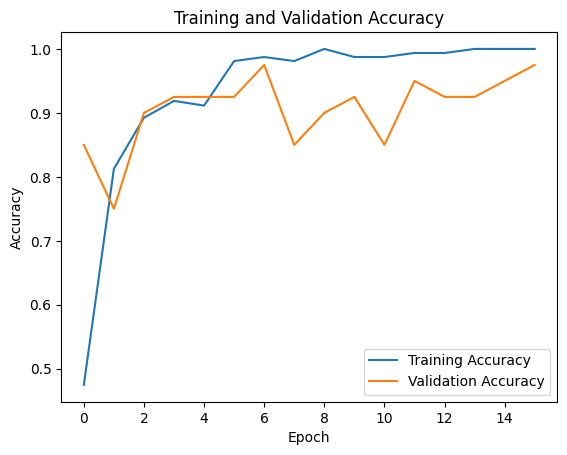

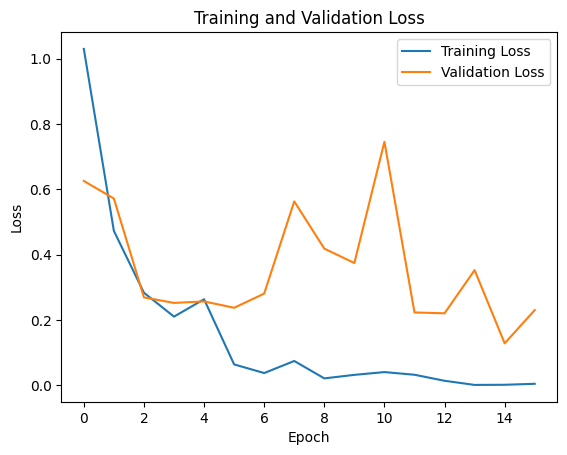

In [38]:
# plotting
# training v/s validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# training v/s validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [39]:
# evaluating the model
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# predictiing classes
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# getting true classes
true_classes = test_generator.classes

# generating class labels
class_labels = list(test_generator.class_indices.keys())

# generating classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))



2/2 [==============================] - 0s 163ms/step - loss: 0.3425 - accuracy: 0.9000
Test Loss: 0.3425127863883972
Test Accuracy: 0.8999999761581421
7/7 [==============================] - 2s 234ms/step
                 precision    recall  f1-score   support

          Covid       0.92      0.92      0.92        26
         Normal       0.80      0.80      0.80        20
Viral Pneumonia       0.75      0.75      0.75        20

       accuracy                           0.83        66
      macro avg       0.82      0.82      0.82        66
   weighted avg       0.83      0.83      0.83        66



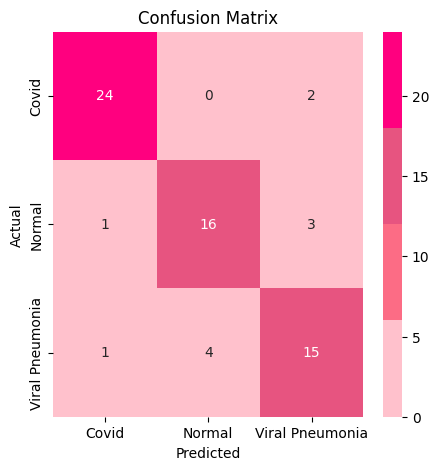

In [40]:
colors = ['#FFC1CC', '#FC6C85', '#E75480' ,'#FF007F']  # These are different shades of pink
cmap = sns.color_palette(colors, as_cmap=True)

# plotting confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap=cmap, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

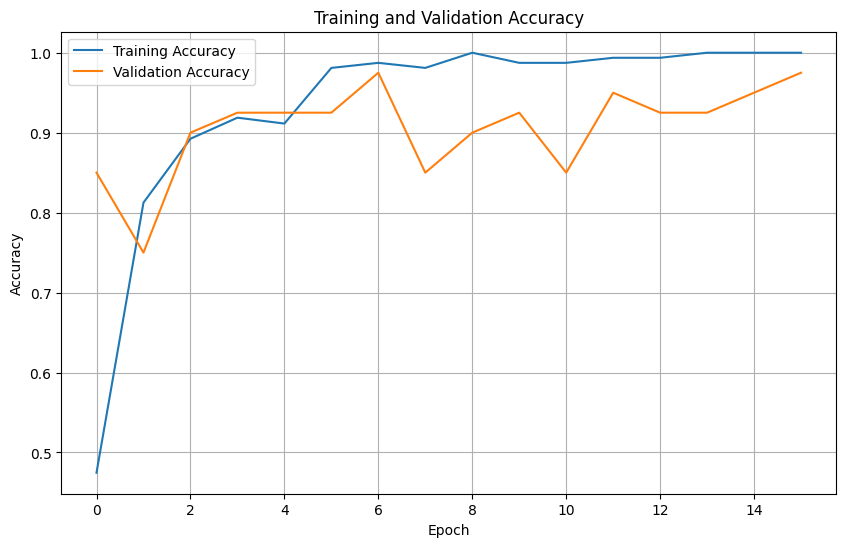

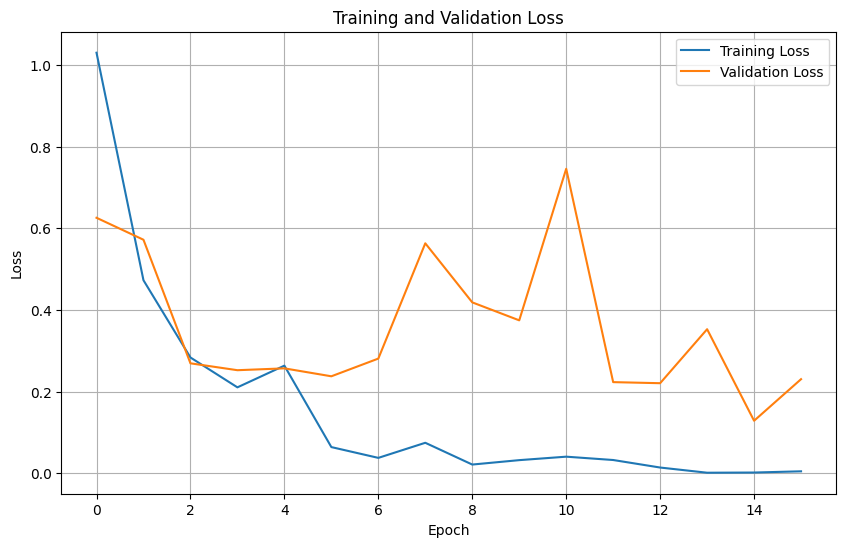

In [41]:
# plotting
# training v/s validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# training v/s validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.grid(True)
plt.show()